In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.shape

(25, 2)

In [9]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

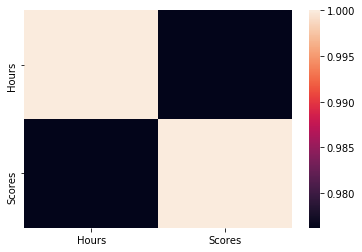

In [10]:
sns.heatmap(data.corr())

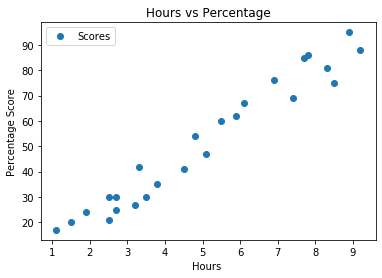

In [11]:
data.plot('Hours','Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours ')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data

In [12]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Training the Algorithm

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

[1.49514211]
[[9.87171443]]


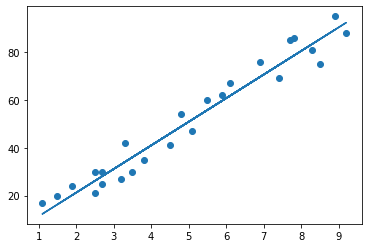

In [38]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [26]:
y_pred =lr.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


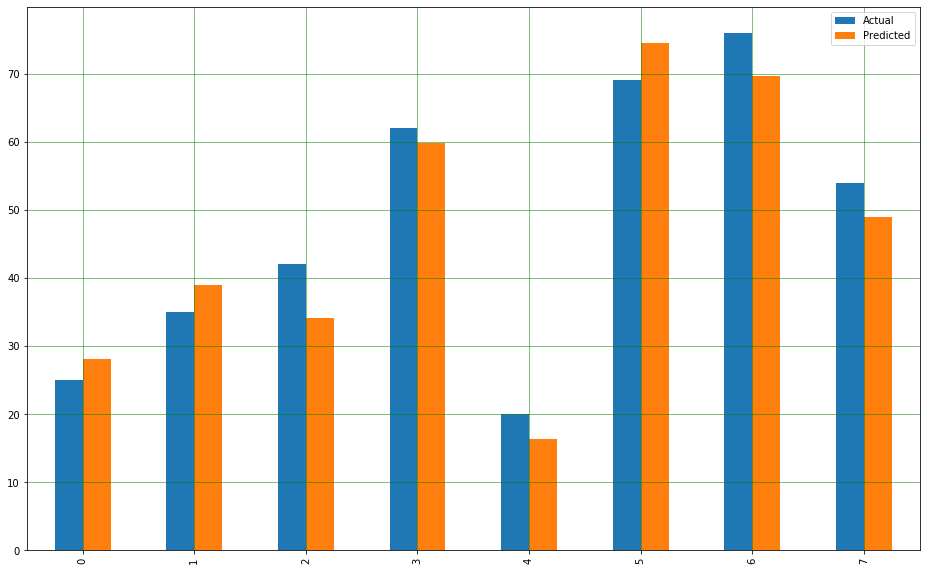

In [32]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

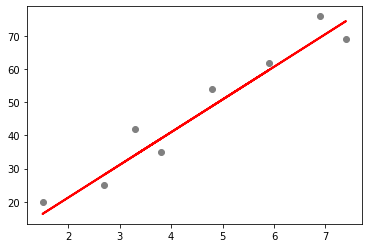

In [33]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [45]:
# You can also test with your own data
hours = np.array([9.25]).reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.80850057]


## Evaluating the mode

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 4.762517892332275
Mean Squared Error: 25.678419573283865
Root Mean Squared Error: 5.0673878451608445


In [46]:
metrics.r2_score(y_test, y_pred)

0.9309458862687437